In [1]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import glob,os

files = glob.glob('data/*.csv')
print(files)

['data\\t_TC_112_1.csv', 'data\\t_TC_112_2.csv', 'data\\t_TC_114_1.csv', 'data\\t_TC_115_1.csv', 'data\\t_TC_115_2.csv', 'data\\t_TC_115_3.csv', 'data\\t_TC_117_2.csv', 'data\\t_TC_117_3.csv', 'data\\t_TC_162A_1.csv', 'data\\t_TC_162A_2.csv', 'data\\t_TC_162A_3.csv', 'data\\t_TC_162A_4.csv', 'data\\t_TC_162A_5.csv', 'data\\t_TC_162A_6.csv', 'data\\t_TC_162B_1.csv', 'data\\t_TC_162B_2.csv', 'data\\t_TC_162B_3.csv', 'data\\t_TC_162B_4.csv', 'data\\t_TC_162B_5.csv', 'data\\t_TC_162B_6.csv', 'data\\t_TC_303_1.csv', 'data\\t_TC_303_2.csv', 'data\\t_TC_304_1.csv', 'data\\t_TC_304_3.csv', 'data\\t_TC_304_4.csv', 'data\\t_TC_305_1.csv', 'data\\t_TC_305_2.csv', 'data\\t_TC_305_3.csv', 'data\\t_TC_305_4.csv', 'data\\t_TC_306_1.csv', 'data\\t_TC_306_2.csv', 'data\\t_TC_306_3.csv', 'data\\t_TC_306_4.csv', 'data\\t_TC_309_1.csv', 'data\\t_TC_309_10.csv', 'data\\t_TC_309_2.csv', 'data\\t_TC_309_3.csv', 'data\\t_TC_309_4.csv', 'data\\t_TC_309_5.csv', 'data\\t_TC_309_6.csv', 'data\\t_TC_309_7.csv', 'd

In [3]:
df = pd.concat([pd.read_csv(f).assign(f_name=os.path.basename(f).split('t_')[1].split('.')[0]) for f in files])
print(df)

       Unnamed: 0  time  current  voltage  name       f_name
0               1   434     8403     2059     1     TC_112_1
1               2   453     8380     2030     2     TC_112_1
2               3   453     8390     2041     3     TC_112_1
3               4   451     8382     2003     4     TC_112_1
4               5   288     8154     1524     5     TC_112_1
5               6   291     8157     1551     6     TC_112_1
6               7   286     8245     1541     7     TC_112_1
7               8   583     8480     2541     8     TC_112_1
8               9   448     8384     1857     9     TC_112_1
9              10   442     8383     1989    10     TC_112_1
10             11   453     8396     1972    11     TC_112_1
11             12   441     8392     1980    12     TC_112_1
12             13   447     8401     1960    13     TC_112_1
13             14   311     8240     1972    14     TC_112_1
14             15   363     7770     1640    15     TC_112_1
15             16   369 

In [4]:
df.head()

Unnamed: 0  time  current  voltage  name    f_name
0           1   434     8403     2059     1  TC_112_1
1           2   453     8380     2030     2  TC_112_1
2           3   453     8390     2041     3  TC_112_1
3           4   451     8382     2003     4  TC_112_1
4           5   288     8154     1524     5  TC_112_1

In [5]:
df.columns

Index(['Unnamed: 0', 'time', 'current', 'voltage', 'name', 'f_name'], dtype='object')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

time  current  voltage  name    f_name
0   434     8403     2059     1  TC_112_1
1   453     8380     2030     2  TC_112_1
2   453     8390     2041     3  TC_112_1
3   451     8382     2003     4  TC_112_1
4   288     8154     1524     5  TC_112_1

In [8]:
df = df.rename(columns={'time':'weld_time','name':'weld_point','f_name':'robot_name'})
df.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

### 분석컨셉

   * weld point별로 전류패턴 비교

       ⓐ 각 로봇별 1개의 weld point에 대한 전류패턴 그래프 (한 그래프에 1개 용접점 전류패턴) X 23개그래프 X 로봇수
       
       ⓑ 각 로봇별 23개의 weld point에 대한 전류패턴 전체 그래프 (한 그래프에 23개 용접점 전류패턴) X 로봇수
     

   * weld time과 전류의 산점도 그래프
   
       ⓐ 각 로봇의 weld time & weld point(1개 용접점) 산점도 그래프
       
       ⓑ 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10022802 entries, 0 to 91784
Data columns (total 5 columns):
weld_time     int64
current       int64
voltage       int64
weld_point    int64
robot_name    object
dtypes: int64(4), object(1)
memory usage: 458.8+ MB


In [10]:
df.isnull().sum()

weld_time     0
current       0
voltage       0
weld_point    0
robot_name    0
dtype: int64

In [11]:
allfiles = glob.glob('data/*.csv')
filelist = []
for i in range(len(allfiles)):
    filelist1 = os.path.basename(allfiles[i]).split('.')[0]
    filelist1 = filelist1.split('t_')[1]
    filelist.append(filelist1)    

In [12]:
filelist[:10]

['TC_112_1',
 'TC_112_2',
 'TC_114_1',
 'TC_115_1',
 'TC_115_2',
 'TC_115_3',
 'TC_117_2',
 'TC_117_3',
 'TC_162A_1',
 'TC_162A_2']

In [13]:
type(filelist[0])

str

In [14]:
for f in filelist:
    globals()['df_{}'.format(f)] = df[df['robot_name'] == f]

In [15]:
df_TC_112_1.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [16]:
df['weld_point'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25,  0, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [17]:
table = df.pivot_table(index = ['weld_point'], columns = ['robot_name'], values = 'current')

In [18]:
table.head()

robot_name     TC_112_1     TC_112_2     TC_114_1     TC_115_1     TC_115_2  \
weld_point                                                                    
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           7582.667049  7497.451882  6704.735211  8104.313025  8023.128772   
2           7581.613839  7515.232404  6736.025366  8060.785989  7968.113684   
3           7590.351708  7510.337547  7022.041173  7573.302977  7941.183860   
4           7518.064599  7413.352772          NaN  7587.230554  7721.710674   

robot_name     TC_115_3     TC_117_2     TC_117_3    TC_162A_1    TC_162A_2  \
weld_point                                                                    
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           8481.165319  7817.810369  7764.736842  8327.126910  8448.031336   
2           8177.599806  8087.615636  7960.138269  8340.265570  7949.645515   
3           8192.153846  8085.029802  7920.722792  7894.130826  9030.025460   
4           8157.582541  7839.295571  7935.627788  7896.016843  8627.002350   

robot_name  ...  TC_RH_205_3  TC_RH_208_2  TC_RH_208_3  TC_RH_209_2  \
weld_point  ...                                                       
0           ...     0.000000     0.000000     0.000000     0.000000   
1           ...  7771.453878  7052.886419  6812.949153  8172.211825   
2           ...  6448.818163  7053.784446  7801.171945  8062.250357   
3           ...  6428.447755  7633.837518  7778.994421  7979.161876   
4           ...  6235.600408  7560.256175  7771.063825  7733.190214   

robot_name  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  TC_RH_211_1  TC_RH_211_2  \
weld_point                                                                      
0                0.000000     0.000000     0.000000     0.000000     0.000000   
1             7763.547979  7514.386419  8428.309951  7819.042193  7798.267686   
2             8226.938342  7558.431892  8348.112357  7793.551773  7774.896840   
3             8224.222177  6930.751835  8317.504486  8163.299225  7721.918230   
4             8218.103533  6920.837276  8256.681892  8081.766205  7365.104405   

robot_name  TC_RH_211_3  
weld_point               
0              0.000000  
1           7665.467486  
2           7633.371956  
3           7728.655474  
4           7818.456609  

[5 rows x 102 columns]

In [19]:
# fill NA values with 0 and reset the index to robot name
table = table.fillna(0).reset_index()

In [20]:
table.head()

robot_name  weld_point     TC_112_1     TC_112_2     TC_114_1     TC_115_1  \
0                    0     0.000000     0.000000     0.000000     0.000000   
1                    1  7582.667049  7497.451882  6704.735211  8104.313025   
2                    2  7581.613839  7515.232404  6736.025366  8060.785989   
3                    3  7590.351708  7510.337547  7022.041173  7573.302977   
4                    4  7518.064599  7413.352772     0.000000  7587.230554   

robot_name     TC_115_2     TC_115_3     TC_117_2     TC_117_3    TC_162A_1  \
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           8023.128772  8481.165319  7817.810369  7764.736842  8327.126910   
2           7968.113684  8177.599806  8087.615636  7960.138269  8340.265570   
3           7941.183860  8192.153846  8085.029802  7920.722792  7894.130826   
4           7721.710674  8157.582541  7839.295571  7935.627788  7896.016843   

robot_name  ...  TC_RH_205_3  TC_RH_208_2  TC_RH_208_3  TC_RH_209_2  \
0           ...     0.000000     0.000000     0.000000     0.000000   
1           ...  7771.453878  7052.886419  6812.949153  8172.211825   
2           ...  6448.818163  7053.784446  7801.171945  8062.250357   
3           ...  6428.447755  7633.837518  7778.994421  7979.161876   
4           ...  6235.600408  7560.256175  7771.063825  7733.190214   

robot_name  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  TC_RH_211_1  TC_RH_211_2  \
0                0.000000     0.000000     0.000000     0.000000     0.000000   
1             7763.547979  7514.386419  8428.309951  7819.042193  7798.267686   
2             8226.938342  7558.431892  8348.112357  7793.551773  7774.896840   
3             8224.222177  6930.751835  8317.504486  8163.299225  7721.918230   
4             8218.103533  6920.837276  8256.681892  8081.766205  7365.104405   

robot_name  TC_RH_211_3  
0              0.000000  
1           7665.467486  
2           7633.371956  
3           7728.655474  
4           7818.456609  

[5 rows x 103 columns]

In [21]:
table.columns

Index(['weld_point', 'TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1',
       'TC_115_2', 'TC_115_3', 'TC_117_2', 'TC_117_3', 'TC_162A_1',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=103)

In [22]:
# extracting the columns(102 columns)
cols = table.columns[1:]

In [23]:
cols

Index(['TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1', 'TC_115_2', 'TC_115_3',
       'TC_117_2', 'TC_117_3', 'TC_162A_1', 'TC_162A_2',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=102)

# K-means clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
import plotly 
print('plotly version:',plotly.__version__)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import plotly.plotly as py

import cufflinks as cf
print('cufflinks version: ',cf.__version__)

# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)
cf.go_offline()

plotly version: 3.10.0
cufflinks version:  0.16


In [26]:
cluster = KMeans(n_clusters=3)

In [27]:
table['cluster'] = cluster.fit_predict(table[table.columns[2:]])

In [28]:
table['cluster'] = cluster.fit_predict(table[table.columns[2:]])

robot_name  weld_point  TC_112_1  TC_112_2  TC_114_1  TC_115_1  TC_115_2  \
41                  41       0.0       0.0       0.0       0.0       0.0   
42                  42       0.0       0.0       0.0       0.0       0.0   
43                  43       0.0       0.0       0.0       0.0       0.0   
44                  44       0.0       0.0       0.0       0.0       0.0   
45                  45       0.0       0.0       0.0       0.0       0.0   

robot_name  TC_115_3  TC_117_2  TC_117_3    TC_162A_1  ...  TC_RH_208_2  \
41               0.0       0.0       0.0  8583.124314  ...          0.0   
42               0.0       0.0       0.0  8586.631765  ...          0.0   
43               0.0       0.0       0.0  8628.126275  ...          0.0   
44               0.0       0.0       0.0  9352.920615  ...          0.0   
45               0.0       0.0       0.0  9356.662769  ...          0.0   

robot_name  TC_RH_208_3  TC_RH_209_2  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  \
41                  0.0          0.0            0.0          0.0          0.0   
42                  0.0          0.0            0.0          0.0          0.0   
43                  0.0          0.0            0.0          0.0          0.0   
44                  0.0          0.0            0.0          0.0          0.0   
45                  0.0          0.0            0.0          0.0          0.0   

robot_name  TC_RH_211_1  TC_RH_211_2  TC_RH_211_3  cluster  
41                  0.0          0.0          0.0        0  
42                  0.0          0.0          0.0        0  
43                  0.0          0.0          0.0        0  
44                  0.0          0.0          0.0        0  
45                  0.0          0.0          0.0        0  

[5 rows x 104 columns]

In [29]:
table.shape

(46, 104)

In [34]:
pca = PCA(n_components=2)

In [35]:
pca.fit_transform(table[cols])

array([[ 35185.46247077, -10637.32587715],
       [-31621.13644107, -13413.84011455],
       [-31424.51817666, -14036.20099023],
       [-30566.34731531, -11702.61607352],
       [-30126.31030089, -11418.63482223],
       [-30387.74318318, -11471.52274538],
       [-29497.45310001,  -9303.00145029],
       [-29847.88776355,  -8991.27687766],
       [-29809.68425772,  -9142.45946997],
       [-28515.25456011,  -6667.07230747],
       [-27650.4812042 ,  -4806.82256598],
       [-27516.86682575,  -3624.48671709],
       [-26351.79132358,  -1332.3640532 ],
       [-25255.55679678,  -1254.69035308],
       [-26054.6980616 ,   -274.4677054 ],
       [-25106.27771031,    827.47164847],
       [-24148.99422184,   2063.44862963],
       [-24449.70622916,   1821.2106756 ],
       [-24525.57378823,   1133.84352515],
       [-20744.02485485,   6555.38736503],
       [-19035.57357726,   8898.51490608],
       [-10927.28273744,  17501.69644447],
       [-10948.87817801,  17545.42007341],
       [ -8

In [36]:
pca.fit_transform(table[cols]).shape

(46, 2)

In [37]:
# principal component separation to create a 2-dimensional picture
pca = PCA(n_components=2)
table['x'] = pca.fit_transform(table[cols])[:,0]
table['y'] = pca.fit_transform(table[cols])[:,1]
# table['z'] = pca.fit_transform(table[cols])[:,2]
table = table.reset_index()

In [38]:
table.head()

robot_name  index  weld_point     TC_112_1     TC_112_2     TC_114_1  \
0               0           0     0.000000     0.000000     0.000000   
1               1           1  7582.667049  7497.451882  6704.735211   
2               2           2  7581.613839  7515.232404  6736.025366   
3               3           3  7590.351708  7510.337547  7022.041173   
4               4           4  7518.064599  7413.352772     0.000000   

robot_name     TC_115_1     TC_115_2     TC_115_3     TC_117_2     TC_117_3  \
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           8104.313025  8023.128772  8481.165319  7817.810369  7764.736842   
2           8060.785989  7968.113684  8177.599806  8087.615636  7960.138269   
3           7573.302977  7941.183860  8192.153846  8085.029802  7920.722792   
4           7587.230554  7721.710674  8157.582541  7839.295571  7935.627788   

robot_name  ...  TC_RH_209_2  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  \
0           ...     0.000000       0.000000     0.000000     0.000000   
1           ...  8172.211825    7763.547979  7514.386419  8428.309951   
2           ...  8062.250357    8226.938342  7558.431892  8348.112357   
3           ...  7979.161876    8224.222177  6930.751835  8317.504486   
4           ...  7733.190214    8218.103533  6920.837276  8256.681892   

robot_name  TC_RH_211_1  TC_RH_211_2  TC_RH_211_3  cluster             x  \
0              0.000000     0.000000     0.000000        0  35185.462471   
1           7819.042193  7798.267686  7665.467486        1 -31621.136441   
2           7793.551773  7774.896840  7633.371956        1 -31424.518177   
3           8163.299225  7721.918230  7728.655474        1 -30566.347315   
4           8081.766205  7365.104405  7818.456609        1 -30126.310301   

robot_name             y  
0          -10637.325877  
1          -13413.840115  
2          -14036.200990  
3          -11702.616074  
4          -11418.634822  

[5 rows x 107 columns]

In [39]:
weld_point_clusters = table[['weld_point','cluster','x','y']]

In [40]:
weld_point_clusters.head()

robot_name  weld_point  cluster             x             y
0                    0        0  35185.462471 -10637.325877
1                    1        1 -31621.136441 -13413.840115
2                    2        1 -31424.518177 -14036.200990
3                    3        1 -30566.347315 -11702.616074
4                    4        1 -30126.310301 -11418.634822

In [41]:
df.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [42]:
final = merge(df,weld_point_clusters)

In [43]:
final.head()

weld_time  current  voltage  weld_point robot_name  cluster             x  \
0        434     8403     2059           1   TC_112_1        1 -31621.136441   
1        434     8392     2054           1   TC_112_1        1 -31621.136441   
2        444     8388     2045           1   TC_112_1        1 -31621.136441   
3        441     8395     2068           1   TC_112_1        1 -31621.136441   
4        434     8393     2047           1   TC_112_1        1 -31621.136441   

              y  
0 -13413.840115  
1 -13413.840115  
2 -13413.840115  
3 -13413.840115  
4 -13413.840115

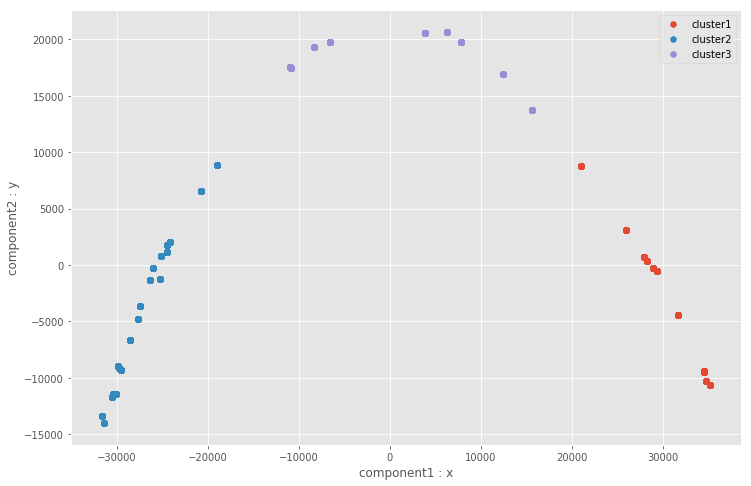

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(final[final.cluster == 0]['x'],
            final[final.cluster == 0]['y'])
plt.scatter(final[final.cluster == 1]['x'],
            final[final.cluster == 1]['y'])
plt.scatter(final[final.cluster == 2]['x'],
            final[final.cluster == 2]['y'])

plt.xlabel('component1 : x')
plt.ylabel('component2 : y')
plt.legend(['cluster1','cluster2','cluster3'])
plt.show()

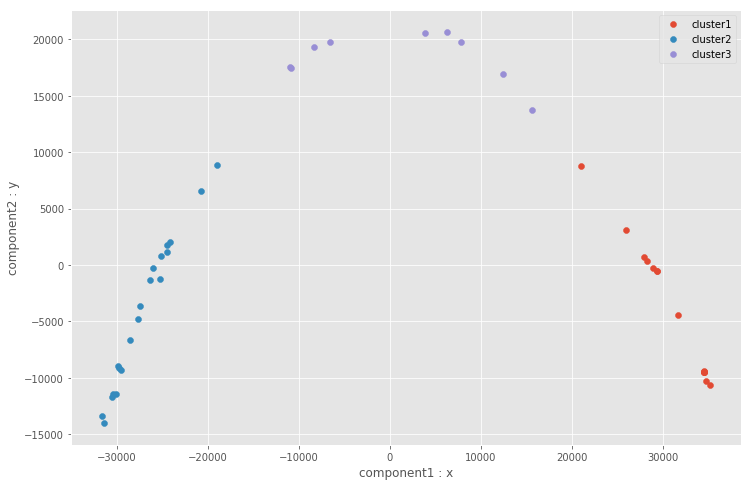

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(weld_point_clusters[weld_point_clusters.cluster == 0]['x'],
            weld_point_clusters[weld_point_clusters.cluster == 0]['y'])
plt.scatter(weld_point_clusters[weld_point_clusters.cluster == 1]['x'],
            weld_point_clusters[weld_point_clusters.cluster == 1]['y'])
plt.scatter(weld_point_clusters[weld_point_clusters.cluster == 2]['x'],
            weld_point_clusters[weld_point_clusters.cluster == 2]['y'])

plt.xlabel('component1 : x')
plt.ylabel('component2 : y')
plt.legend(['cluster1','cluster2','cluster3'])
plt.show()

In [47]:
trace0 = go.Scatter(x = weld_point_clusters[weld_point_clusters.cluster == 0]['x'],
                    y = weld_point_clusters[weld_point_clusters.cluster == 0]['y'],
                    name = 'Cluster1',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(15,152,152,0.5)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace1 = go.Scatter(x = weld_point_clusters[weld_point_clusters.cluster == 1]['x'],
                    y = weld_point_clusters[weld_point_clusters.cluster == 1]['y'],
                    name = 'Cluster2',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(180,18,180,0.5)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace2 = go.Scatter(x = weld_point_clusters[weld_point_clusters.cluster == 2]['x'],
                    y = weld_point_clusters[weld_point_clusters.cluster == 2]['y'],
                    name = 'Cluster3',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(132,132,132,0.8)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))


# trace3 = go.Scatter(x = weld_point_clusters[weld_point_clusters.cluster == 3]['x'],
#                     y = weld_point_clusters[weld_point_clusters.cluster == 3]['y'],
#                     name = 'Cluster4',
#                     mode = 'markers',
#                     marker = dict(size = 10,
#                                   color = 'rgba(122,122,12,0.8)',
#                                   line = dict(width = 1, color = 'rgba(0,0,0)')))
# trace4 = go.Scatter(x = weld_point_clusters[weld_point_clusters.cluster == 4]['x'],
#                     y = weld_point_clusters[weld_point_clusters.cluster == 4]['y'],
#                     name = 'Cluster5',
#                     mode = 'markers',
#                     marker = dict(size = 10,
#                                   color = 'rgba(230,20,30,0.5)',
#                                   line = dict(width = 1, color = 'rgba(0,0,0)')))
# data = [trace0,trace1,trace2,trace3,trace4]

data = [trace0,trace1,trace2]
plot(data)

'temp-plot.html'

In [160]:
final['0'] = final.cluster == 0
final.groupby('0').current.value_counts()

0      current
False  0          83980
       5320        4729
       4650        4324
       4326        4293
       4649        4290
       4406        3971
       5319        3825
       4648        3612
       5321        3539
       4651        3507
       4407        3487
       7773        3463
       4405        3364
       7772        3266
       5096        3179
       7774        2994
       5097        2977
       5095        2899
       4808        2832
       7771        2808
       5098        2791
       7775        2787
       4647        2713
       4262        2685
       4809        2660
       4807        2630
       7776        2622
       4818        2559
       4325        2555
       7777        2538
                  ...  
True   10094          1
       10096          1
       10222          1
       12825          1
       12869          1
       13040          1
       13041          1
       13046          1
       13061          1
       13063          1
 

In [166]:
print(final[final.cluster == 0]['current'].count())
print(final[final.cluster == 1]['current'].count())
print(final[final.cluster == 2]['current'].count())

7856121
616119
1550562


In [165]:
final[final.cluster == 0]['current']

0          8403
1          8392
2          8388
3          8395
4          8393
5          8391
6          8397
7          8390
8          8385
9          8394
10         8394
11         8396
12         8405
13         8399
14         8392
15         8405
16         8392
17         8390
18         8401
19         8389
20         8397
21         8400
22         8439
23         8402
24         8397
25         8389
26         8452
27         8387
28         8399
29         8387
           ... 
7856091    6506
7856092    6597
7856093    7917
7856094    6604
7856095    6520
7856096    7544
7856097    7343
7856098    8022
7856099    7564
7856100    6609
7856101    6589
7856102    7538
7856103    8010
7856104    6506
7856105    7340
7856106    6523
7856107    6503
7856108    7919
7856109    6493
7856110    6510
7856111    6477
7856112    6584
7856113    7924
7856114    6519
7856115    6489
7856116    6479
7856117    6526
7856118    8027
7856119    7586
7856120    6511
Name: current, Length: 7

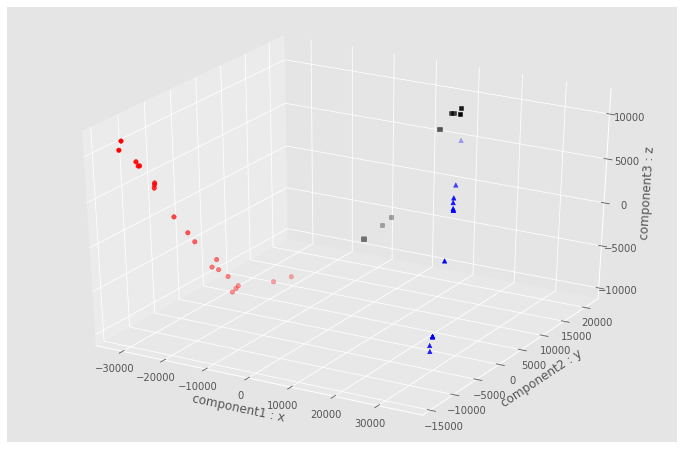

In [154]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(weld_point_clusters[weld_point_clusters.cluster == 0]['x'],
#            weld_point_clusters[weld_point_clusters.cluster == 0]['y'],
#            weld_point_clusters[weld_point_clusters.cluster == 0]['z'],
#            c='red', marker='o')
# ax.scatter(weld_point_clusters[weld_point_clusters.cluster == 1]['x'],
#            weld_point_clusters[weld_point_clusters.cluster == 1]['y'],
#            weld_point_clusters[weld_point_clusters.cluster == 1]['z'],
#            c='blue', marker='^')
# ax.scatter(weld_point_clusters[weld_point_clusters.cluster == 2]['x'],
#            weld_point_clusters[weld_point_clusters.cluster == 2]['y'],
#            weld_point_clusters[weld_point_clusters.cluster == 2]['z'],
#            c='black', marker='s')

# ax.set_xlabel('component1 : x')
# ax.set_ylabel('component2 : y')
# ax.set_zlabel('component3 : z')
# plt.show()



In [161]:
final.head()

weld_time  current  voltage  weld_point robot_name  cluster             x  \
0        434     8403     2059           1   TC_112_1        0 -31621.136441   
1        434     8392     2054           1   TC_112_1        0 -31621.136441   
2        444     8388     2045           1   TC_112_1        0 -31621.136441   
3        441     8395     2068           1   TC_112_1        0 -31621.136441   
4        434     8393     2047           1   TC_112_1        0 -31621.136441   

              y             z     0  
0 -13413.840115  11230.870477  True  
1 -13413.840115  11230.870477  True  
2 -13413.840115  11230.870477  True  
3 -13413.840115  11230.870477  True  
4 -13413.840115  11230.870477  True

In [77]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i,init='k-means++',random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
    plt.show()    

In [82]:
table1 = df[['current','weld_point']]

In [83]:
elbow(table1)

KeyboardInterrupt: 

In [96]:
globals()['df_{}'.format(filelist[0])]['weld_time'].head()

0    434
1    453
2    453
3    451
4    288
Name: weld_time, dtype: int64

In [97]:
len(filelist)

102

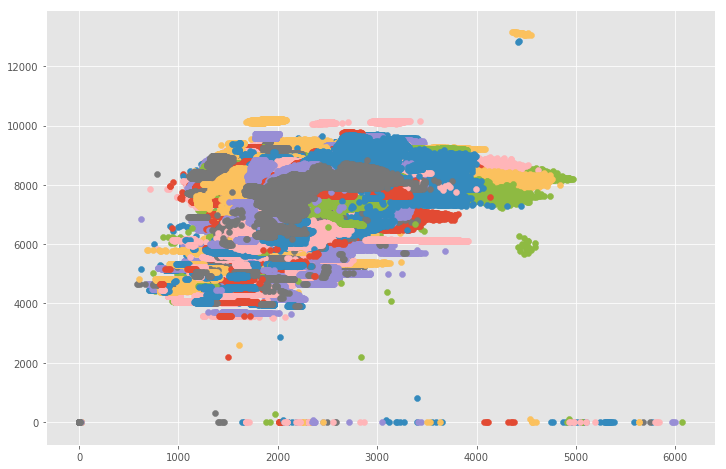

In [98]:
plt.figure(figsize=(12,8))

# plt.scatter(globals()['df_{}'.format(filelist[0])]['voltage'],
#             globals()['df_{}'.format(filelist[0])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[1])]['voltage'],
#             globals()['df_{}'.format(filelist[1])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[2])]['voltage'],
#             globals()['df_{}'.format(filelist[2])]['current'],marker='o')

for i in range(len(filelist)):
    plt.scatter(globals()['df_{}'.format(filelist[i])]['voltage'],
                globals()['df_{}'.format(filelist[i])]['current'],marker='o')

In [ ]:
plt.figure(figsize=(12,8))

# plt.scatter(globals()['df_{}'.format(filelist[0])]['voltage'],
#             globals()['df_{}'.format(filelist[0])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[1])]['voltage'],
#             globals()['df_{}'.format(filelist[1])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[2])]['voltage'],
#             globals()['df_{}'.format(filelist[2])]['current'],marker='o')

for i in range(len(filelist)):
    plt.scatter(globals()['df_{}'.format(filelist[i])]['current'],
                globals()['df_{}'.format(filelist[i])]['current'],marker='o')

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=globals()['df_{}'.format(filelist[0])],x='weld_point',y='current')

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)

sns.boxplot(data=df_TC_112_1,x='weld_point',y='current',ax=ax1)
sns.boxplot(data=df_TC_112_2,x='weld_point',y='current',ax=ax2)
sns.boxplot(data=df_TC_114_1,x='weld_point',y='current',ax=ax3)
sns.boxplot(data=df_TC_115_1,x='weld_point',y='current',ax=ax4)

ax1.set(xlabel='weld_point',ylabel='current')
ax2.set(xlabel='weld_point',ylabel='current')
ax3.set(xlabel='weld_point',ylabel='current')
ax4.set(xlabel='weld_point',ylabel='current')

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_TC_112_1,x='weld_point',y='weld_time')

In [ ]:
TC_112_1 = pd.read_csv('t_TC_112_1.csv',index_col=False)
TC_112_2 = pd.read_csv('t_TC_112_2.csv',index_col=False)

TC_114_1 = pd.read_csv('t_TC_114_1.csv',index_col=False)

TC_115_1 = pd.read_csv('t_TC_115_1.csv',index_col=False)
TC_115_2 = pd.read_csv('t_TC_115_2.csv',index_col=False)
TC_115_3 = pd.read_csv('t_TC_115_3.csv',index_col=False)

TC_117_2 = pd.read_csv('t_TC_117_2.csv',index_col=False)
TC_117_3 = pd.read_csv('t_TC_117_3.csv',index_col=False)

TC_162A_1 = pd.read_csv('t_TC_162A_1.csv',index_col=False)
TC_162A_2 = pd.read_csv('t_TC_162A_2.csv',index_col=False)
TC_162A_3 = pd.read_csv('t_TC_162A_3.csv',index_col=False)
TC_162A_4 = pd.read_csv('t_TC_162A_4.csv',index_col=False)
TC_162A_5 = pd.read_csv('t_TC_162A_5.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)

TC_162B_1 = pd.read_csv('t_TC_162B_1.csv',index_col=False)
TC_162B_2 = pd.read_csv('t_TC_162B_2.csv',index_col=False)
TC_162B_3 = pd.read_csv('t_TC_162B_3.csv',index_col=False)
TC_162B_4 = pd.read_csv('t_TC_162B_4.csv',index_col=False)
TC_162B_5 = pd.read_csv('t_TC_162B_5.csv',index_col=False)
TC_162B_6 = pd.read_csv('t_TC_162B_6.csv',index_col=False)

TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)

TC_303_1 = pd.read_csv('t_TC_303_1.csv',index_col=False)
TC_303_2 = pd.read_csv('t_TC_303_2.csv',index_col=False)

TC_304_1 = pd.read_csv('t_TC_304_1.csv',index_col=False)
TC_304_3 = pd.read_csv('t_TC_304_3.csv',index_col=False)
TC_304_4 = pd.read_csv('t_TC_304_4.csv',index_col=False)

TC_305_1 = pd.read_csv('t_TC_305_1.csv',index_col=False)
TC_305_2 = pd.read_csv('t_TC_305_2.csv',index_col=False)
TC_305_3 = pd.read_csv('t_TC_305_3.csv',index_col=False)
TC_305_4 = pd.read_csv('t_TC_305_4.csv',index_col=False)

TC_306_1 = pd.read_csv('t_TC_306_1.csv',index_col=False)
TC_306_2 = pd.read_csv('t_TC_306_2.csv',index_col=False)
TC_306_3 = pd.read_csv('t_TC_306_3.csv',index_col=False)
TC_306_4 = pd.read_csv('t_TC_306_4.csv',index_col=False)

TC_309_1 = pd.read_csv('t_TC_309_1.csv',index_col=False)
TC_309_2 = pd.read_csv('t_TC_309_2.csv',index_col=False)
TC_309_3 = pd.read_csv('t_TC_309_3.csv',index_col=False)
TC_309_4 = pd.read_csv('t_TC_309_4.csv',index_col=False)
TC_309_5 = pd.read_csv('t_TC_309_5.csv',index_col=False)
TC_309_6 = pd.read_csv('t_TC_309_6.csv',index_col=False)
TC_309_7 = pd.read_csv('t_TC_309_7.csv',index_col=False)
TC_309_8 = pd.read_csv('t_TC_309_8.csv',index_col=False)
TC_309_9 = pd.read_csv('t_TC_309_9.csv',index_col=False)
TC_309_10 = pd.read_csv('t_TC_309_10.csv',index_col=False)

TC_310_1 = pd.read_csv('t_TC_310_1.csv',index_col=False)
TC_310_2 = pd.read_csv('t_TC_310_2.csv',index_col=False)
TC_310_3 = pd.read_csv('t_TC_310_3.csv',index_col=False)
TC_310_4 = pd.read_csv('t_TC_310_4.csv',index_col=False)

TC_311_1 = pd.read_csv('t_TC_311_1.csv',index_col=False)
TC_311_2 = pd.read_csv('t_TC_311_2.csv',index_col=False)
TC_311_3 = pd.read_csv('t_TC_311_3.csv',index_col=False)
TC_311_4 = pd.read_csv('t_TC_311_4.csv',index_col=False)

TC_312_1 = pd.read_csv('t_TC_312_1.csv',index_col=False)
TC_312_2 = pd.read_csv('t_TC_312_2.csv',index_col=False)
TC_312_3 = pd.read_csv('t_TC_312_3.csv',index_col=False)
TC_312_4 = pd.read_csv('t_TC_312_4.csv',index_col=False)

TC_313_1 = pd.read_csv('t_TC_313_1.csv',index_col=False)
TC_313_2 = pd.read_csv('t_TC_313_2.csv',index_col=False)
TC_313_3 = pd.read_csv('t_TC_313_3.csv',index_col=False)
TC_313_4 = pd.read_csv('t_TC_313_4.csv',index_col=False)

TC_314_1 = pd.read_csv('t_TC_314_1.csv',index_col=False)
TC_314_2 = pd.read_csv('t_TC_314_2.csv',index_col=False)
TC_314_3 = pd.read_csv('t_TC_314_3.csv',index_col=False)
TC_314_4 = pd.read_csv('t_TC_314_4.csv',index_col=False)

TC_318_1 = pd.read_csv('t_TC_318_1.csv',index_col=False)
TC_318_2 = pd.read_csv('t_TC_318_2.csv',index_col=False)
TC_318_3 = pd.read_csv('t_TC_318_3.csv',index_col=False)
TC_318_4 = pd.read_csv('t_TC_318_4.csv',index_col=False)

TC_319_3 = pd.read_csv('t_TC_319_3.csv',index_col=False)
TC_319_4 = pd.read_csv('t_TC_319_4.csv',index_col=False)

TC_323_1 = pd.read_csv('t_TC_323_1.csv',index_col=False)
TC_323_2 = pd.read_csv('t_TC_323_2.csv',index_col=False)
TC_323_3 = pd.read_csv('t_TC_323_3.csv',index_col=False)
TC_323_4 = pd.read_csv('t_TC_323_4.csv',index_col=False)

TC_324_1 = pd.read_csv('t_TC_324_1.csv',index_col=False)
TC_324_2 = pd.read_csv('t_TC_324_2.csv',index_col=False)
TC_324_3 = pd.read_csv('t_TC_324_3.csv',index_col=False)
TC_324_4 = pd.read_csv('t_TC_324_4.csv',index_col=False)

TC_365_1 = pd.read_csv('t_TC_365_1.csv',index_col=False)

TC_LH_205_1 = pd.read_csv('t_TC_LH_205_1.csv',index_col=False)
TC_LH_205_2 = pd.read_csv('t_TC_LH_205_2.csv',index_col=False)
TC_LH_205_3 = pd.read_csv('t_TC_LH_205_3.csv',index_col=False)

TC_LH_208_2 = pd.read_csv('t_TC_LH_208_2.csv',index_col=False)
TC_LH_208_3 = pd.read_csv('t_TC_LH_208_3.csv',index_col=False)

TC_LH_209_2 = pd.read_csv('t_TC_LH_209_2.csv',index_col=False)
TC_LH_209_2_1 = pd.read_csv('t_TC_LH_209_2_1.csv',index_col=False)

TC_LH_210_1 = pd.read_csv('t_TC_LH_210_1.csv',index_col=False)
TC_LH_210_2 = pd.read_csv('t_TC_LH_210_2.csv',index_col=False)

TC_LH_211_1 = pd.read_csv('t_TC_LH_211_1.csv',index_col=False)
TC_LH_211_2 = pd.read_csv('t_TC_LH_211_2.csv',index_col=False)
TC_LH_211_3 = pd.read_csv('t_TC_LH_211_3.csv',index_col=False)

TC_RH_205_1 = pd.read_csv('t_TC_RH_205_1.csv',index_col=False)
TC_RH_205_2 = pd.read_csv('t_TC_RH_205_2.csv',index_col=False)
TC_RH_205_3 = pd.read_csv('t_TC_RH_205_3.csv',index_col=False)

TC_RH_208_2 = pd.read_csv('t_TC_RH_208_2.csv',index_col=False)
TC_RH_208_3 = pd.read_csv('t_TC_RH_208_3.csv',index_col=False)

TC_RH_209_2 = pd.read_csv('t_TC_RH_209_2.csv',index_col=False)
TC_RH_209_2_1 = pd.read_csv('t_TC_RH_209_2_1.csv',index_col=False)

TC_RH_210_1 = pd.read_csv('t_TC_RH_210_1.csv',index_col=False)
TC_RH_210_2 = pd.read_csv('t_TC_RH_210_2.csv',index_col=False)

TC_RH_211_1 = pd.read_csv('t_TC_RH_211_1.csv',index_col=False)
TC_RH_211_2 = pd.read_csv('t_TC_RH_211_2.csv',index_col=False)
TC_RH_211_3 = pd.read_csv('t_TC_RH_211_3.csv',index_col=False)